In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "-1"  # Set to 1 or the desired number of cores

In [3]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)  # Convert target to integer type
print(f"Shape of dataset: {X.shape}")


Shape of dataset: (70000, 784)


In [4]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Apply t-SNE to the data (on a subset for computational reasons)
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled[:10000])  # Reduce data to 10,000 samples for faster computation
y_subset = y[:10000]  # Corresponding labels for the subset


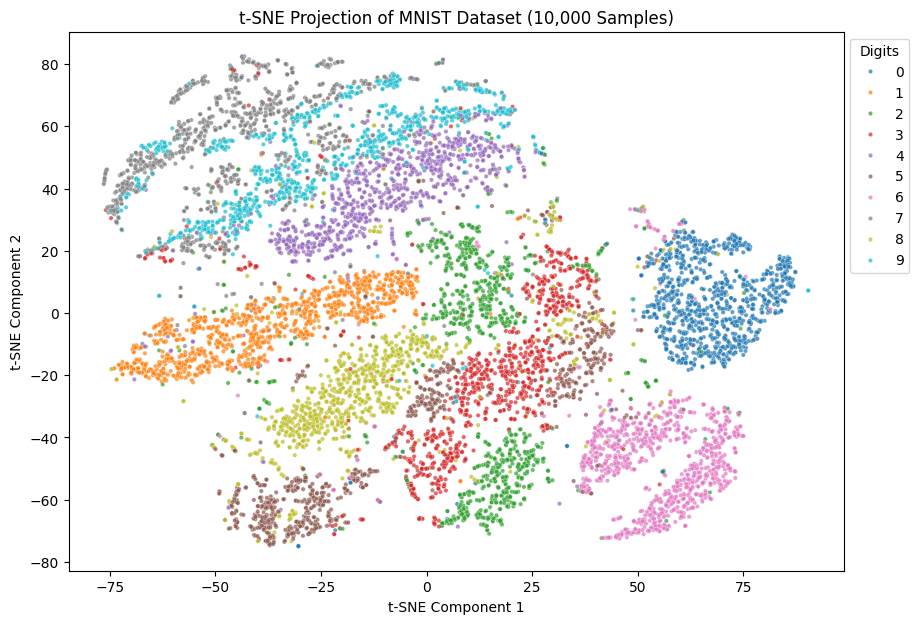

In [7]:
# Plot the t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_subset, palette='tab10', s=10, alpha=0.7)
plt.title('t-SNE Projection of MNIST Dataset (10,000 Samples)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digits', loc='best', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# Apply t-SNE on the full dataset (will take longer)
tsne_full = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne_full = tsne_full.fit_transform(X_scaled)

# Plot the full t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne_full[:, 0], y=X_tsne_full[:, 1], hue=y, palette='tab10', s=10, alpha=0.7)
plt.title('t-SNE Projection of Full MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digits', loc='best', bbox_to_anchor=(1, 1))
plt.show()
